In [ ]:
#!pip install hvplot
#Importing Libraries
import numpy as np
import pandas as pd
#import hvplot.pandas
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split

import os
import joblib

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving Hascol_Final_data_with_infScoreV1.csv to Hascol_Final_data_with_infScoreV1 (1).csv


In [ ]:
ndf = pd.read_csv('Hascol_Final_data_with_infScoreV1.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
ndf

,Unnamed: 0,Open,High,Low,Close,Volume,Sen_score,Sen_label,Infleunce,T_id,TWITTER HANDLE,s_score_mean,s_sentiment_label,Infs_add,Infs_mean,next_day_close_price,next_day_open_price
Date,,,,,,,,,,,,,,,,,
2016-12-31,365,338.25,349.195,336.880,345.955,1359150,[],[],[],[],[],0.00000,NaN,1.692995e+04,0.000000e+00,345.955,338.25
2017-01-01,366,338.25,349.195,336.880,345.955,1359150,[],[],[],[],[],0.00000,NaN,1.692995e+04,0.000000e+00,354.390,339.50
2017-02-01,367,339.50,354.390,337.250,354.390,1694400,[],[],[],[],[],0.00000,NaN,1.692995e+04,0.000000e+00,354.790,358.99
2017-03-01,368,358.99,364.000,352.000,354.790,1710500,[],[],[],[],[],0.00000,NaN,1.692995e+04,0.000000e+00,353.970,353.32
2017-04-01,369,353.32,359.890,353.000,353.970,580300,[],[],[],[],[],0.00000,NaN,1.692995e+04,0.000000e+00,351.040,350.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,1456,24.40,24.400,23.500,24.400,5771500,[0.2023],['Pos'],[1274582.498159],['1210430591692353536'],['dawn_com'],0.20230,Pos,1.274582e+06,1.274582e+06,25.010,24.70
2019-12-28,1457,24.70,25.010,24.155,25.010,4427750,[],[],[],[],[],0.00000,NaN,6.503076e+05,0.000000e+00,25.010,24.70
2019-12-29,1458,24.70,25.010,24.155,25.010,4427750,[0.],['Neu'],[26032.629646],['1211154502751010816'],['TheCurrentPK'],0.00000,Neu,2.603263e+04,2.603263e+04,25.620,25.00


In [ ]:
ndf = ndf[['Close','Open','Low','High','s_score_mean' ,"next_day_open_price" , "Infs_add"]]
ndf = ndf.dropna()
ndf

,Close,Open,Low,High,s_score_mean,next_day_open_price,Infs_add
Date,,,,,,,
2016-12-31,345.955,338.25,336.880,349.195,0.00000,338.25,1.692995e+04
2017-01-01,345.955,338.25,336.880,349.195,0.00000,339.50,1.692995e+04
2017-02-01,354.390,339.50,337.250,354.390,0.00000,358.99,1.692995e+04
2017-03-01,354.790,358.99,352.000,364.000,0.00000,353.32,1.692995e+04
2017-04-01,353.970,353.32,353.000,359.890,0.00000,350.98,1.692995e+04
...,...,...,...,...,...,...,...
2019-12-26,23.240,22.49,22.200,23.240,0.00000,24.40,6.406415e+05
2019-12-27,24.400,24.40,23.500,24.400,0.20230,24.70,1.274582e+06
2019-12-28,25.010,24.70,24.155,25.010,0.00000,24.70,6.503076e+05


In [ ]:
X = ndf[['Close', 'Infs_add','Open','s_score_mean' ]]
Y = ndf['next_day_open_price']
yy = np.array(Y).reshape(-1, 1)

In [ ]:
X_split = int(0.7 * len(X))
y_split = int(0.7 * len(yy))

X_train = X[: X_split]
X_test = X[X_split:]
y_train = yy[: y_split]
y_test = yy[y_split:]
X_train

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
print(X_train)

                Infs_add     Open  s_score_mean
Date                                           
2016-12-31  16929.945538  338.250           0.0
2017-01-01  16929.945538  338.250           0.0
2017-02-01  16929.945538  339.500           0.0
2017-03-01  16929.945538  358.990           0.0
2017-04-01  16929.945538  353.320           0.0
...                  ...      ...           ...
2019-01-31   1334.300237  156.820           0.0
2019-01-02    829.343797  168.990           0.0
2019-02-02   1122.927304  169.445           0.0
2019-03-02   1122.927304  169.445           0.0
2019-04-02   1122.927304  169.900           0.0

[766 rows x 3 columns]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Use the MinMaxScaler to scale data between 0 and 1.
x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()

# Fit the scaler for the Training Data
x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

# Scale the training data
X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)

# Fit the scaler for the Testing Data
x_test_scaler.fit(X_test)
y_test_scaler.fit(y_test)

# Scale the y_test data
X_test = x_test_scaler.transform(X_test)
y_test = y_test_scaler.transform(y_test)

In [ ]:
model = RandomForestRegressor(n_estimators= 1000, max_depth=2, bootstrap=False, min_samples_leaf=1 )

In [ ]:

# Fit the model
model.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=False, max_depth=2, n_estimators=1000)

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [ ]:
# Make some predictions
predicted = model.predict(X_test)

In [ ]:
predicted1 = model.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error
# Evaluating the model
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R-squared :', metrics.r2_score(y_test, predicted))
print('Mean Squared Error:', mean_squared_error(y_test, predicted))

Root Mean Squared Error: 0.07681646537190977
R-squared : 0.9264699971636243
Mean Squared Error: 0.005900769352233813


Text(0.5, 1.0, 'Stock Prediction of Hascol')

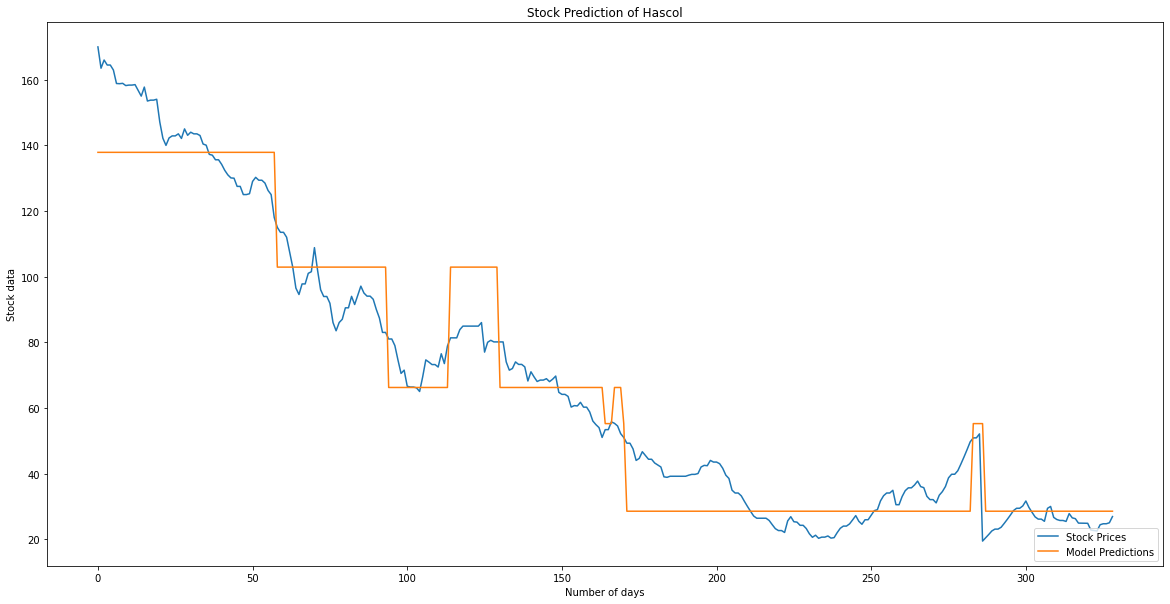

In [ ]:
plt.figure(figsize=(20,10))
#range_future = len(predicted)
plt.plot( np.array(stocks['Real']),label='Test data')
plt.plot( np.array(stocks['Predicted']),label='Prediction')
plt.legend(['Stock Prices', 'Model Predictions'], loc='lower right')
plt.ylabel('Stock data')
plt.xlabel('Number of days')
plt.title('Stock Prediction of Hascol')